In [ ]:


import networkx as nx
import numpy as np
import time
import random
from random import choices





n=[20,40,80,160,320]

A=list(range(20))
B=list(range(40))
C=list(range(80))
D=list(range(160))
E=list(range(320))
F=list(range(640))

A_p=[2,6,10,14,18]
B_p=[4,12,20,28,36]
C_p=[8,24,40,56,72]
D_p=[16,48,80,112,144]
E_p=[32,96,160,224,288]
F_p=[64,192,320,448,576]

A1=[A_p[0],B_p[0],C_p[0],D_p[0],E_p[0],F_p[0]]
A2=[A_p[1],B_p[1],C_p[1],D_p[1],E_p[1],F_p[1]]
A3=[A_p[2],B_p[2],C_p[2],D_p[2],E_p[2],F_p[2]]
A4=[A_p[3],B_p[3],C_p[3],D_p[3],E_p[3],F_p[3]]
A5=[A_p[4],B_p[4],C_p[4],D_p[4],E_p[4],F_p[4]]


random_nodes=[A,B,C,D,E,F]

iteration=0

Cons_time=[]
Exit_prob=[]
def probability(chance):
    return random.random() > chance

for num in range(0,len(n)):
    timer=[]
    consensus=[]
    iteration=0
    G=nx.generators.classic.complete_graph(n[num])
    node_comp=random_nodes[num]    
    while iteration!=100:
        count=0
        Opinion=0
        for i in range(0,int(3*n[num]/10)):
            G.nodes[i]['opinion'] = -1
        for i in range(int(n[num]/2),n[num]):
            G.nodes[i]['opinion'] = 1
        opinion_total=[G.nodes[i]['opinion'] for i in range(0,n[num])]
        while abs(Opinion)!=n[num]:
                count+=1
                random_agent=random.choice(node_comp)
                sum_num=G.nodes[random_agent]['opinion']
                neighbour_list=list(G.nodes)
                neighbour_list.remove(random_agent)
                for j in neighbour_list:            
                    sum_num=sum_num+G.nodes[j]['opinion']
                if probability(0.4):    
                    if sum_num==0:
                        G.nodes[random_agent]['opinion'] = np.random.choice([-1,1],1,p=[0.5,0.5])
                    else:
                        G.nodes[random_agent]['opinion']=sum_num/abs(sum_num)
                else:
                    G.nodes[random_agent]['opinion']=1
                opinion_total=[G.nodes[i]['opinion'] for i in range(0,n[num])]
                Opinion=sum(opinion_total)
                print(Opinion)
        timer.append(count)
        consensus.append(opinion_total[0])   
        iteration+=1
    np.asarray(timer)    
    Cons_time.append(np.mean(timer))
    plusone=0
    for i in consensus:
        if i==1:
            plusone+=1
    Exit_prob.append(plusone)

for i in Cons_time:
    print (i)



Streaming output truncated to the last 5000 lines.
[-4.]
[-4.]
[-4.]
[-6.]
[-4.]
[-6.]
[-6.]
[-6.]
[-4.]
[-6.]
[-6.]
[-6.]
[-8.]
[-8.]
[-8.]
[-6.]
[-6.]
[-6.]
[-6.]
[-4.]
[-4.]
[-6.]
[-6.]
[-8.]
[-8.]
[-6.]
[-8.]
[-6.]
[-8.]
[-6.]
[-4.]
[-4.]
[-4.]
[-4.]
[-6.]
[-4.]
[-4.]
[-4.]
[-6.]
[-4.]
[-6.]
[-6.]
[-6.]
[-4.]
[-6.]
[-8.]
[-8.]
[-8.]
[-8.]
[-8.]
[-10.]
[-10.]
[-10.]
[-10.]
[-8.]
[-8.]
[-8.]
[-8.]
[-8.]
[-8.]
[-8.]
[-8.]
[-6.]
[-6.]
[-6.]
[-8.]
[-10.]
[-10.]
[-8.]
[-8.]
[-6.]
[-6.]
[-6.]
[-6.]
[-6.]
[-6.]
[-6.]
[-4.]
[-6.]
[-8.]
[-6.]
[-4.]
[-2.]
[-2.]
[0.]
[2.]
[4.]
[6.]
[8.]
[10.]
[12.]
[12.]
[12.]
[12.]
[12.]
[14.]
[16.]
[16.]
[16.]
[18.]
[20.]
[20.]
[22.]
[22.]
[22.]
[22.]
[22.]
[22.]
[22.]
[22.]
[22.]
[22.]
[22.]
[22.]
[22.]
[22.]
[22.]
[24.]
[24.]
[24.]
[24.]
[24.]
[24.]
[24.]
[24.]
[24.]
[24.]
[24.]
[24.]
[26.]
[26.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[28.]
[30.]
[30.]
[30.]
[30.]
[30.]
[30.]
[30.]
[30.]
[32.]
[32.]


KeyboardInterrupt: ignored

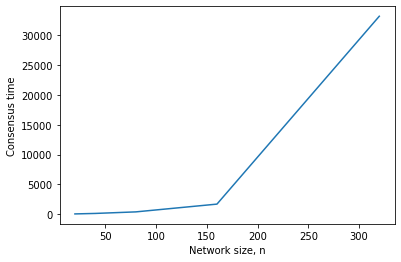

In [ ]:
import matplotlib.pyplot as plt

consensustime=[74.22
,154.55
,415.04
,1715.21
,33162.2]
n=[20,40,80,160,320]

plt.plot(n,consensustime)
plt.xlabel('Network size, n')
plt.ylabel('Consensus time')
plt.show()

In [ ]:
#Code for recursive formula

import matplotlib.pyplot as plt
import math 

N=250
alpha=0.1
p=max(0.25+0.25*math.sqrt(1-(8*0.1)/0.9),-0.1/0.9+math.sqrt((0.1/0.9)**2+0.1/0.9))+0.2
ini=p*N

def p(i,j):
    if j==i+1:
        return ((N-i)/N)*(alpha + (1-alpha)*(i/N)**2)
    if j==i-1:
        return (i/N)*(1-alpha)*((N-i)/N)**2
    if j==i:
        return 1-(i/N)*(1-alpha)*((N-i)/N)**2-((N-i)/N)*(alpha + (1-alpha)*(i/N)**2)
    else:
        return 0

def g(n):
    if n==1:
        return (1/p(1,2))+(p(1,0)/p(1,2))*(1/alpha)
    else:
        return (1/p(n,n+1)) + (p(n,n-1)/p(n,n+1))*(g(n-1))
    
def f(k,l):
    cons_time=0
    for i in range(k,l):
        cons_time+=g(i)
    return cons_time
 

consensustime=[]      
consensustime.append(f(int(ini),N))
print(N,consensustime)




In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 17 12:34:32 2021

@author: noobm
"""

# -*- coding: utf-8 -*-
"""
Created on Tue Mar 16 19:06:43 2021

@author: noobm
"""

# -*- coding: utf-8 -*-
"""
Created on Sun Feb 14 11:33:42 2021

@author: noobm
"""

import networkx as nx
import math
import numpy as np
import time
import random
from random import choices





n=[150,200,250,300,350]

A=list(range(150))
B=list(range(200))
C=list(range(250))
D=list(range(300))
E=list(range(350))




random_nodes=[A,B,C,D,E]

iteration=0

p=max(0.25+0.25*math.sqrt(1-(8*0.1)/0.9),-0.1/0.9+math.sqrt((0.1/0.9)**2+0.1/0.9))+0.2

Cons_time=[]
Exit_prob=[]
def alpha(chance):
    return random.random() > chance

for num in range(0,len(n)):
    timer=[]
    consensus=[]
    iteration=0
    G=nx.generators.classic.complete_graph(n[num])
    node_comp=random_nodes[num]    
    while iteration!=500:
        count=0
        Opinion=0
        for i in range(0,int(p*n[num])):
            G.nodes[i]['opinion'] = 1
        for i in range(int(p*n[num]),n[num]):
            G.nodes[i]['opinion'] = -1
        opinion_total=[G.nodes[i]['opinion'] for i in range(0,n[num])]
        while abs(Opinion)!=n[num]:
                random_agent=random.choice(node_comp)
                sum_num=G.nodes[random_agent]['opinion']
                count+=1
                if alpha(0.1):
                    sampling = np.random.choice(list(G.nodes), size=2,replace=True)
                    for j in sampling:            
                        sum_num=sum_num+G.nodes[j]['opinion']
                    G.nodes[random_agent]['opinion']=sum_num/abs(sum_num)
                else:
                    G.nodes[random_agent]['opinion']=1
                opinion_total=[G.nodes[i]['opinion'] for i in range(0,n[num])]
                Opinion=sum(opinion_total)
        timer.append(count)
        consensus.append(opinion_total[0])   
        iteration+=1
    np.asarray(timer)    
    Cons_time.append(np.mean(timer))
    plusone=0
    for i in consensus:
        if i==1:
            plusone+=1
    Exit_prob.append(plusone)

for i in Cons_time:
    print (i)



1161.518
1597.118
2050.214
2487.348
2967.094


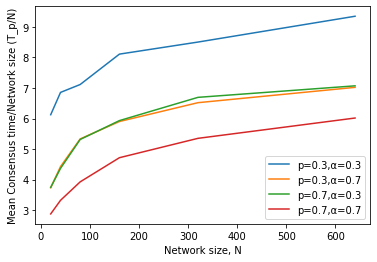

In [ ]:
import matplotlib.pyplot as plt

p03_a03=[122.48/20
,274.22/40
,569.12/80
,1297.66/160
,2721.77/320
,5985.06/640]
n=[20,40,80,160,320,640]

p03_a07=[74.63/20
,177.01/40
,426.47/80
,944.31/160
,2086.01/320
,4493.76/640]

p07_a03=[74.86/20
,174.64/40
,425.03/80
,949.08/160
,2141.96/320
,4525.57/640]

p07_a07=[57.47/20
,132.76/40
,313.88/80
,754.52/160
,1712.06/320
,3850.28/640]



plt.plot(n,p03_a03, label='p=0.3,α=0.3')
plt.plot(n,p03_a07, label='p=0.3,α=0.7')
plt.plot(n,p07_a03, label='p=0.7,α=0.3')
plt.plot(n,p07_a07, label='p=0.7,α=0.7')
plt.legend()
plt.xlabel('Network size, N')
plt.ylabel('Mean Consensus time/Network size (T_p/N)')
plt.show()

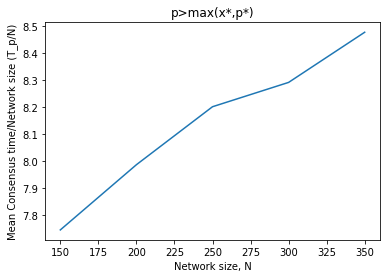

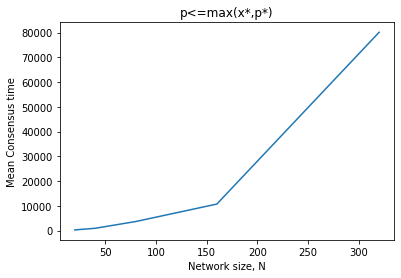

In [ ]:
import matplotlib.pyplot as plt

1161.518
1597.118
2050.214
2487.348
2967.094

cons_time=[1161.518/150,1597.118/200,2050.214/250,2487.348/300,2967.094/350]
n_1=[150,200,250,300,350]
cons_time_2=[238.62
,888.89
,3623.67
,10683.52
,80107.48]
n=[20,40,80,160,320]





plt.plot(n_1,cons_time)
plt.title('p>max(x*,p*)')
plt.xlabel('Network size, N')
plt.ylabel('Mean Consensus time/Network size (T_p/N)')
plt.show()

plt.plot(n,cons_time_2)
plt.title('p<=max(x*,p*)')
plt.xlabel('Network size, N')
plt.ylabel('Mean Consensus time')
plt.show()

In [ ]:
import math
import random
from scipy.integrate import quad

alpha=0.1


    
def f(x):
    return math.log(((1-alpha)*x*(1-x))/(alpha+(1-alpha)*x**2))

xbar=(1/4)*(1-math.sqrt(1-8*alpha/(1-alpha)))
xbarup=(1/4)*(1+math.sqrt(1-8*alpha/(1-alpha)))

ans, err=quad(f,xbar,0.43145)

value=3
list=[0]
while value!=0:
  y=random.uniform(0.43,0.432)
  ans, err=quad(f,xbar,y)
  value=ans
  list[0]=y
  
print(list)

KeyboardInterrupt: ignored

In [9]:
#Cyclic Graphs

import networkx as nx
import math
import numpy as np
import time
import random
from random import choices





n=[50,100,200]

A=list(range(50))
B=list(range(100))
C=list(range(200))



random_nodes=[A,B,C]

iteration=0

p=max(0.25+0.25*math.sqrt(1-(8*0.1)/0.9),-0.1/0.9+math.sqrt((0.1/0.9)**2+0.1/0.9))+0.2

Cons_time=[]
Exit_prob=[]
def alpha(chance):
    return random.random() > chance

for num in range(0,len(n)):
    timer=[]
    consensus=[]
    iteration=0
    G=nx.generators.classic.cycle_graph(n[num])
    node_comp=random_nodes[num]    
    while iteration!=20:
        count=0
        Opinion=0
        for i in range(0,int(n[num])):
            G.nodes[i]['opinion'] = -1
        opinion_total=[G.nodes[i]['opinion'] for i in range(0,n[num])]
        while abs(Opinion)!=n[num]:
                random_agent=random.choice(node_comp)
                sum_num=G.nodes[random_agent]['opinion']
                count+=1
                if alpha(0.05):
                    sampling = np.random.choice(list(G.nodes), size=2,replace=True)
                    for j in sampling:            
                        sum_num=sum_num+G.nodes[j]['opinion']
                    G.nodes[random_agent]['opinion']=sum_num/abs(sum_num)
                else:
                    G.nodes[random_agent]['opinion']=1
                opinion_total=[G.nodes[i]['opinion'] for i in range(0,n[num])]
                Opinion=sum(opinion_total)
        timer.append(count)
        consensus.append(opinion_total[0])   
        iteration+=1
    np.asarray(timer)    
    Cons_time.append(np.mean(timer))
    plusone=0
    for i in consensus:
        if i==1:
            plusone+=1
    Exit_prob.append(plusone)

for i in Cons_time:
    print (i)



53.0
473.2
18678.0


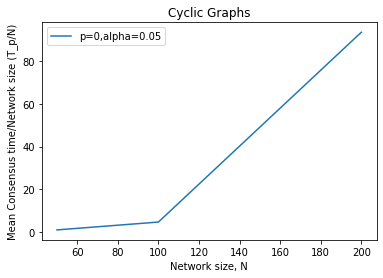

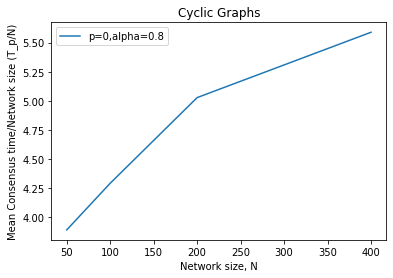

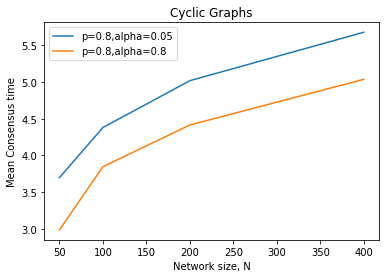

In [23]:
#Cyclic graph, Plots

import matplotlib.pyplot as plt







cons_time1=[53/50,473.2/100,18678/200]
n_1=[50,100,200]
cons_time2=[194.626/50,429.262/100,1005.534/200,2235.324/400]
cons_time3=[184.814/50,437.942/100,1003.518/200,2270.97/400]
cons_time4=[149.23/50,384.526/100,882.796/200,2014.378/400]
n=[50,100,200,400]





plt.plot(n_1,cons_time1, label='p=0,alpha=0.05')
plt.title('Cyclic Graphs')
plt.xlabel('Network size, N')
plt.legend(loc='upper left')
plt.ylabel('Mean Consensus time/Network size (T_p/N)')
plt.show()

plt.plot(n,cons_time2, label='p=0,alpha=0.8')
plt.title('Cyclic Graphs')
plt.xlabel('Network size, N')
plt.legend(loc='upper left')
plt.ylabel('Mean Consensus time/Network size (T_p/N)')
plt.show()

plt.plot(n,cons_time3, label='p=0.8,alpha=0.05')
plt.plot(n,cons_time4, label='p=0.8,alpha=0.8')
plt.title('Cyclic Graphs')
plt.xlabel('Network size, N')
plt.legend(loc='upper left')
plt.ylabel('Mean Consensus time')
plt.show()

In [26]:
#D-Regular Graphs

import networkx as nx
import math
import numpy as np
import time
import random
from random import choices





n=[50,100,200,400]

A=list(range(50))
B=list(range(100))
C=list(range(200))
D=list(range(400))


random_nodes=[A,B,C,D]

iteration=0

p=max(0.25+0.25*math.sqrt(1-(8*0.1)/0.9),-0.1/0.9+math.sqrt((0.1/0.9)**2+0.1/0.9))+0.2

Cons_time=[]
Exit_prob=[]
def alpha(chance):
    return random.random() > chance

for num in range(0,len(n)):
    timer=[]
    consensus=[]
    iteration=0
    G=nx.generators.random_graphs.random_regular_graph(4,n[num])
    node_comp=random_nodes[num]    
    while iteration!=500:
        count=0
        Opinion=0
        for i in range(0,int(n[num])):
            G.nodes[i]['opinion'] = -1
        opinion_total=[G.nodes[i]['opinion'] for i in range(0,n[num])]
        while abs(Opinion)!=n[num]:
                random_agent=random.choice(node_comp)
                sum_num=G.nodes[random_agent]['opinion']
                count+=1
                if alpha(0.8):
                    sampling = np.random.choice(list(G.nodes), size=2,replace=True)
                    for j in sampling:            
                        sum_num=sum_num+G.nodes[j]['opinion']
                    G.nodes[random_agent]['opinion']=sum_num/abs(sum_num)
                else:
                    G.nodes[random_agent]['opinion']=1
                opinion_total=[G.nodes[i]['opinion'] for i in range(0,n[num])]
                Opinion=sum(opinion_total)
        timer.append(count)
        consensus.append(opinion_total[0])   
        iteration+=1
    np.asarray(timer)    
    Cons_time.append(np.mean(timer))
    plusone=0
    for i in consensus:
        if i==1:
            plusone+=1
    Exit_prob.append(plusone)

for i in Cons_time:
    print (i)



190.08
456.104
998.766
2294.83


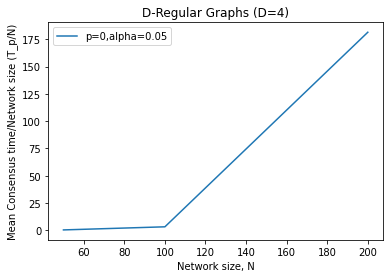

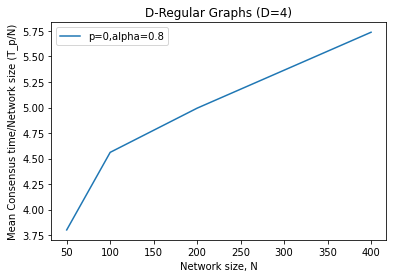

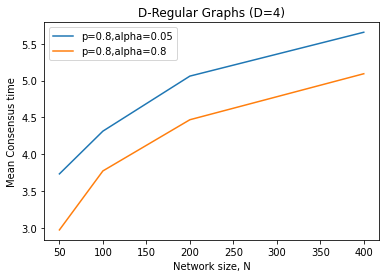

In [27]:
import matplotlib.pyplot as plt

cons_time1=[17.26/50,319.02/100,36283.42/200]
n_1=[50,100,200]
cons_time2=[190.08/50,456.104/100,998.766/200,2294.83/400]
cons_time3=[186.572/50,431.298/100,1012.3/200,2263.278/400]
cons_time4=[148.468/50,377.178/100,893.614/200,2037.528/400]
n=[50,100,200,400]








plt.plot(n_1,cons_time1, label='p=0,alpha=0.05')
plt.title('D-Regular Graphs (D=4)')
plt.xlabel('Network size, N')
plt.legend(loc='upper left')
plt.ylabel('Mean Consensus time/Network size (T_p/N)')
plt.show()

plt.plot(n,cons_time2, label='p=0,alpha=0.8')
plt.title('D-Regular Graphs (D=4)')
plt.xlabel('Network size, N')
plt.legend(loc='upper left')
plt.ylabel('Mean Consensus time/Network size (T_p/N)')
plt.show()

plt.plot(n,cons_time3, label='p=0.8,alpha=0.05')
plt.plot(n,cons_time4, label='p=0.8,alpha=0.8')
plt.title('D-Regular Graphs (D=4)')
plt.xlabel('Network size, N')
plt.legend(loc='upper left')
plt.ylabel('Mean Consensus time')
plt.show()

In [ ]:
import math
import random
import numpy as np 
from scipy import optimize
from scipy.integrate import quad

alpha=0.1


    
def f(x):
    return math.log(((1-alpha)*x*(1-x))/(alpha+(1-alpha)*x**2))

xbar=(1/4)*(1-math.sqrt(1-8*alpha/(1-alpha)))



def g(x):
  return (x*math.log((9*abs(x-1)*abs(x))/(9*x**2+1))-2*np.arctan(3*x)/3-math.log(abs(x-1)))-(xbar*math.log((9*abs(xbar-1)*abs(xbar))/(9*xbar**2+1))-2*np.arctan(3*xbar)/3-math.log(abs(xbar-1)))

root = optimize.newton(g,0.43,fprime=f, maxiter=1000,tol=1.48e-10)
print(root)

print(g(root))

ans, err= quad(f,xbar, root)

print(ans)

print(xbar)



0.4308683796813381
-1.3877787807814457e-16
-6.737258635209614e-17
0.16666666666666669


In [ ]:
print(1-1/3)

0.6666666666666667


In [ ]:
abs(-5)


5